In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
import pickle
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder
import nltk 
import string
import re
import nltk
from nltk.tokenize import RegexpTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re

%matplotlib inline
pd.set_option('display.max_colwidth', 100)
%pip install Unidecode
from unidecode import unidecode

Note: you may need to restart the kernel to use updated packages.


## Dataset Exploration 

In [2]:
# Load dataset
def load_data():
    data = pd.read_csv("Hate_data.csv")
    return data

In [3]:
tweet_df = load_data()
tweet_df.head()

,class,tweet
0,1,@user .@user gives white nationalist troll a platform to spread his hate. won't be reading/buy...
1,1,how many#pols passed by how many times and said nothing? #bluelivesmatter #draintheswamp #fer...
2,1,live the c.o.w.s ðï¸ compensatory call-in or 641.715.3640 code: 564943# iswarâ¦
3,1,@user f*** this ð¦ðº government that deliberately toures #refugees. we just had a coronial ...
4,1,#christians saying i am not racist is â¦ enough protest and denounce #retweetâ¦


In [4]:
print('Dataset size:',tweet_df.shape)
print('Columns are:',tweet_df.columns)

Dataset size: (7678, 2)
Columns are: Index(['class', 'tweet'], dtype='object')


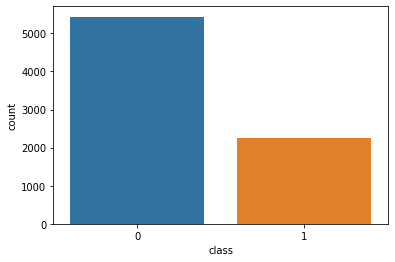

In [5]:
sns.countplot(x = 'class', data = tweet_df)

In [6]:
df  = pd.DataFrame(tweet_df[['class', 'tweet']])


## Text Preprocessing

In [7]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.corpus import stopwords
import re
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer() 

def preprocess(sentence):
    sentence=str(sentence)
    sentence = sentence.lower()
    sentence=sentence.replace('{html}',"")
    sentence=sentence.replace('@user',"")
    sentence=sentence.replace('â',"")
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', sentence)
    rem_url=re.sub(r'http\S+', '',cleantext)
    rem_num = re.sub('[0-9]+', '', rem_url)
    tokenizer = RegexpTokenizer(r'\w+')
    tokens = tokenizer.tokenize(rem_num)  
    filtered_words = [w for w in tokens if len(w) > 2 if not w in stopwords.words('english')]
    stem_words=[stemmer.stem(w) for w in filtered_words]
    lemma_words=[lemmatizer.lemmatize(w) for w in stem_words]
    #lemma_words=[lemmatizer.lemmatize(w) for w in filtered_words]
    return " ".join(filtered_words)


df['cleanText']=df['tweet'].map(lambda s:preprocess(s)) 


df.head(50)

,class,tweet,cleanText
0,1,@user .@user gives white nationalist troll a platform to spread his hate. won't be reading/buy...,gives white nationalist troll platform spread hate reading buying boo
1,1,how many#pols passed by how many times and said nothing? #bluelivesmatter #draintheswamp #fer...,many pols passed many times said nothing bluelivesmatter draintheswamp ferguson
2,1,live the c.o.w.s ðï¸ compensatory call-in or 641.715.3640 code: 564943# iswarâ¦,live compensatory call code iswar
3,1,@user f*** this ð¦ðº government that deliberately toures #refugees. we just had a coronial ...,government deliberately toures refugees coronial inquest hamid death amp busi
4,1,#christians saying i am not racist is â¦ enough protest and denounce #retweetâ¦,christians saying racist enough protest denounce retweet
5,1,"how dare you accurately poray #treasonoustrump china? next they'll say he's a #fascist, lapdog ...",dare accurately poray treasonoustrump china next say fascist lapdog putin
6,1,@user @user so wonderful to see an intelligent woman stand her ground against a condescending jerk,wonderful see intelligent woman stand ground condescending jerk
7,1,antics are purposedly used by #liberals to divide us #wakeupamericaca,antics purposedly used liberals divide wakeupamericaca
8,1,@user .@user ends 2016 with a hopeful message against in the music industry viaâ¦,ends hopeful message music industry via
9,1,fuck donald trump! he will never be my president! #opkkk #optrump #illegitimate #oligarch #plut...,fuck donald trump never president opkkk optrump illegitimate oligarch plutocrat shill


## Modeling

In [30]:
Train_X, Test_X, Train_Y, Test_Y = model_selection.train_test_split(df['cleanText'],df['class'],test_size=0.3)

Encoder = LabelEncoder()
Train_Y = Encoder.fit_transform(Train_Y)
Test_Y = Encoder.fit_transform(Test_Y)

In [64]:
Tfidf_vect = TfidfVectorizer(max_features=9000)
Tfidf_vect.fit(df['cleanText'])
Train_X_Tfidf = Tfidf_vect.transform(Train_X)
Test_X_Tfidf = Tfidf_vect.transform(Test_X)

In [65]:
print(Tfidf_vect.vocabulary_)

{'gives': 2043, 'white': 8528, 'nationalist': 3277, 'troll': 7680, 'platform': 4204, 'spread': 6514, 'hate': 2215, 'reading': 4968, 'buying': 705, 'boo': 603, 'many': 3009, 'pols': 4309, 'passed': 3879, 'times': 7423, 'said': 5535, 'nothing': 3382, 'bluelivesmatter': 583, 'draintheswamp': 1430, 'ferguson': 1796, 'live': 2882, 'call': 718, 'code': 946, 'government': 2099, 'deliberately': 1267, 'toures': 7545, 'refugees': 5087, 'coronial': 1072, 'inquest': 2498, 'hamid': 2174, 'death': 1235, 'amp': 174, 'christians': 882, 'saying': 5635, 'racist': 4852, 'enough': 1581, 'protest': 4649, 'denounce': 1288, 'retweet': 5267, 'dare': 1206, 'poray': 4341, 'treasonoustrump': 7632, 'china': 865, 'next': 3337, 'say': 5632, 'fascist': 1745, 'putin': 4764, 'wonderful': 8703, 'see': 5748, 'woman': 8681, 'stand': 6575, 'ground': 2134, 'jerk': 2608, 'purposedly': 4750, 'used': 8022, 'liberals': 2837, 'divide': 1387, 'wakeupamericaca': 8280, 'ends': 1563, 'hopeful': 2348, 'message': 3098, 'music': 3238,

In [66]:

Naive = naive_bayes.MultinomialNB()
Naive.fit(Train_X_Tfidf,Train_Y)
Naive_scores= cross_val_score(Naive, Train_X_Tfidf,Train_Y, cv=5 , scoring='accuracy')
predictions_NB = Naive.predict(Test_X_Tfidf)
print(f1_score(Test_Y, predictions_NB, average='micro') ) 


0.8728298611111112


In [69]:
# Classifier - Algorithm - SVM
SVM = svm.SVC()
SVM.fit(Train_X_Tfidf,Train_Y)
predictions_SVM = SVM.predict(Test_X_Tfidf)
print(f1_score(Test_Y, predictions_SVM, average='micro') ) 



#from sklearn.externals import joblib
#joblib.dump(SVM, 'SVM_spam_model.pkl')

0.7061631944444444


In [38]:
sv_clf = SVC(random_state=22)

param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
]

grid_sv = GridSearchCV(sv_clf, param_grid, cv=5, scoring="accuracy")
grid_sv.fit(Train_X_Tfidf,Train_Y)
predictions_SVC = grid_sv.predict(Test_X_Tfidf)
print(f1_score(Test_Y, predictions_SVC, average='micro') ) 


0.9014756944444444


## Flair

In [39]:

data = df[['class', 'cleanText']].rename(columns={"class":"label", "cleanText":"text"})
 
data['label'] = '__label__' + data['label'].astype(str)
data.iloc[0:int(len(data)*0.8)].to_csv('train.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.8):int(len(data)*0.9)].to_csv('test.csv', sep='\t', index = False, header = False)
data.iloc[int(len(data)*0.9):].to_csv('dev.csv', sep='\t', index = False, header = False);

data.head()

,label,text
0,__label__1,gives white nationalist troll platform spread hate reading buying boo
1,__label__1,many pols passed many times said nothing bluelivesmatter draintheswamp ferguson
2,__label__1,live compensatory call code iswar
3,__label__1,government deliberately toures refugees coronial inquest hamid death amp busi
4,__label__1,christians saying racist enough protest denounce retweet


In [52]:
%pip install flair

from flair.data_fetcher import NLPTaskDataFetcher
from flair.embeddings import WordEmbeddings, BertEmbeddings, FlairEmbeddings, DocumentLSTMEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer
from pathlib import Path
corpus = NLPTaskDataFetcher.load_classification_corpus(Path('./'), test_file='test.csv', dev_file='dev.csv', train_file='train.csv')
#word_embeddings = [BertEmbeddings('bert-base-multilingual-cased'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]

word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]

document_embeddings = DocumentLSTMEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)

classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)

trainer = ModelTrainer(classifier, corpus)

trainer.train('./', max_epochs=30,learning_rate=0.1 )



Note: you may need to restart the kernel to use updated packages.


C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated function (or staticmethod) load_classification_corpus. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  


2019-08-31 10:50:26,566 Reading data from .
2019-08-31 10:50:26,569 Train: train.csv
2019-08-31 10:50:26,570 Dev: dev.csv
2019-08-31 10:50:26,571 Test: test.csv


C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\flair\data_fetcher.py:447: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\flair\data_fetcher.py:454: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\flair\data_fetcher.py:463: DeprecationWarning: Call to deprecated function (or staticmethod) read_text_classification_file. (Use 'flair.datasets' instead.) -- Deprecated since version 0.4.1.
  max_tokens_per_doc=max_tokens_per_doc,
C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated class DocumentLSTMEmbeddings. (The 

2019-08-31 10:50:28,675 {'1', '0'}
2019-08-31 10:50:28,829 ----------------------------------------------------------------------------------------------------
2019-08-31 10:50:28,830 Evaluation method: MICRO_F1_SCORE
2019-08-31 10:50:31,024 ----------------------------------------------------------------------------------------------------
2019-08-31 10:50:45,953 epoch 1 - iter 0/192 - loss 0.67066592
2019-08-31 10:50:50,133 epoch 1 - iter 19/192 - loss 0.61078798
2019-08-31 10:50:54,101 epoch 1 - iter 38/192 - loss 0.58537072
2019-08-31 10:50:58,126 epoch 1 - iter 57/192 - loss 0.56635242
2019-08-31 10:51:02,321 epoch 1 - iter 76/192 - loss 0.54234983
2019-08-31 10:51:06,456 epoch 1 - iter 95/192 - loss 0.52635179
2019-08-31 10:51:10,661 epoch 1 - iter 114/192 - loss 0.51651365
2019-08-31 10:51:14,709 epoch 1 - iter 133/192 - loss 0.50893550
2019-08-31 10:51:18,705 epoch 1 - iter 152/192 - loss 0.50317723
2019-08-31 10:51:22,834 epoch 1 - iter 171/192 - loss 0.49257232
2019-08-31 10:

2019-08-31 10:59:48,208 EPOCH 7 done: loss 0.3292 - lr 0.1000 - bad epochs 1
2019-08-31 10:59:59,005 DEV : loss 0.23843613266944885 - score 0.9128
2019-08-31 11:00:09,593 TEST : loss 0.2519419193267822 - score 0.8969
2019-08-31 11:00:13,286 ----------------------------------------------------------------------------------------------------
2019-08-31 11:00:28,383 epoch 8 - iter 0/192 - loss 0.31444120
2019-08-31 11:00:32,414 epoch 8 - iter 19/192 - loss 0.31727595
2019-08-31 11:00:36,472 epoch 8 - iter 38/192 - loss 0.31492540
2019-08-31 11:00:40,481 epoch 8 - iter 57/192 - loss 0.31298032
2019-08-31 11:00:44,447 epoch 8 - iter 76/192 - loss 0.31677962
2019-08-31 11:00:48,529 epoch 8 - iter 95/192 - loss 0.31552746
2019-08-31 11:00:52,502 epoch 8 - iter 114/192 - loss 0.31171862
2019-08-31 11:00:56,556 epoch 8 - iter 133/192 - loss 0.31483337
2019-08-31 11:01:00,718 epoch 8 - iter 152/192 - loss 0.32283544
2019-08-31 11:01:04,784 epoch 8 - iter 171/192 - loss 0.32819892
2019-08-31 11:0

2019-08-31 11:09:16,857 ----------------------------------------------------------------------------------------------------
2019-08-31 11:09:16,859 EPOCH 14 done: loss 0.2908 - lr 0.0500 - bad epochs 2
2019-08-31 11:09:27,549 DEV : loss 0.25180527567863464 - score 0.9102
2019-08-31 11:09:38,316 TEST : loss 0.26894474029541016 - score 0.889
2019-08-31 11:09:38,321 ----------------------------------------------------------------------------------------------------
2019-08-31 11:09:53,151 epoch 15 - iter 0/192 - loss 0.25144938
2019-08-31 11:09:57,287 epoch 15 - iter 19/192 - loss 0.27153592
2019-08-31 11:10:01,339 epoch 15 - iter 38/192 - loss 0.27207209
2019-08-31 11:10:05,900 epoch 15 - iter 57/192 - loss 0.28312132
2019-08-31 11:10:10,022 epoch 15 - iter 76/192 - loss 0.28326814
2019-08-31 11:10:14,179 epoch 15 - iter 95/192 - loss 0.28506702
2019-08-31 11:10:18,333 epoch 15 - iter 114/192 - loss 0.28281293
2019-08-31 11:10:22,394 epoch 15 - iter 133/192 - loss 0.28512939
2019-08-31 

2019-08-31 11:18:27,246 epoch 21 - iter 152/192 - loss 0.27628133
2019-08-31 11:18:31,234 epoch 21 - iter 171/192 - loss 0.27142982
2019-08-31 11:18:35,272 epoch 21 - iter 190/192 - loss 0.26574063
2019-08-31 11:18:37,055 ----------------------------------------------------------------------------------------------------
2019-08-31 11:18:37,056 EPOCH 21 done: loss 0.2648 - lr 0.0125 - bad epochs 1
2019-08-31 11:18:47,594 DEV : loss 0.27006879448890686 - score 0.9049
2019-08-31 11:18:58,123 TEST : loss 0.2883322238922119 - score 0.8838
2019-08-31 11:18:58,128 ----------------------------------------------------------------------------------------------------
2019-08-31 11:19:12,779 epoch 22 - iter 0/192 - loss 0.20482716
2019-08-31 11:19:16,773 epoch 22 - iter 19/192 - loss 0.27101259
2019-08-31 11:19:20,757 epoch 22 - iter 38/192 - loss 0.27405163
2019-08-31 11:19:24,747 epoch 22 - iter 57/192 - loss 0.27642227
2019-08-31 11:19:28,859 epoch 22 - iter 76/192 - loss 0.26729828
2019-08-31

2019-08-31 11:27:38,032 epoch 28 - iter 95/192 - loss 0.24920915
2019-08-31 11:27:42,024 epoch 28 - iter 114/192 - loss 0.25242324
2019-08-31 11:27:46,161 epoch 28 - iter 133/192 - loss 0.25302885
2019-08-31 11:27:50,650 epoch 28 - iter 152/192 - loss 0.25087549
2019-08-31 11:27:54,881 epoch 28 - iter 171/192 - loss 0.25107008
2019-08-31 11:27:59,021 epoch 28 - iter 190/192 - loss 0.25555695
2019-08-31 11:28:00,943 ----------------------------------------------------------------------------------------------------
2019-08-31 11:28:00,944 EPOCH 28 done: loss 0.2551 - lr 0.0031 - bad epochs 0
2019-08-31 11:28:11,557 DEV : loss 0.25600719451904297 - score 0.9102
2019-08-31 11:28:22,212 TEST : loss 0.27372798323631287 - score 0.8838
2019-08-31 11:28:22,216 ----------------------------------------------------------------------------------------------------
2019-08-31 11:28:37,763 epoch 29 - iter 0/192 - loss 0.07784573
2019-08-31 11:28:42,180 epoch 29 - iter 19/192 - loss 0.26433352
2019-08

C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\torch\serialization.py:574: DeprecationWarning: Call to deprecated class DocumentLSTMEmbeddings. (The functionality of this class is moved to 'DocumentRNNEmbeddings') -- Deprecated since version 0.4.
  result = unpickler.load()


2019-08-31 11:31:22,815 0.9021	0.9021	0.9021
2019-08-31 11:31:22,816 
MICRO_AVG: acc 0.8216 - f1-score 0.9021
MACRO_AVG: acc 0.6805 - f1-score 0.7905500000000001
0          tp: 625 - fp: 37 - fn: 38 - tn: 66 - precision: 0.9441 - recall: 0.9427 - accuracy: 0.8929 - f1-score: 0.9434
1          tp: 66 - fp: 38 - fn: 37 - tn: 625 - precision: 0.6346 - recall: 0.6408 - accuracy: 0.4681 - f1-score: 0.6377
2019-08-31 11:31:22,817 ----------------------------------------------------------------------------------------------------


{'test_score': 0.9021,
 'dev_score_history': [0.8529,
  0.8529,
  0.9062,
  0.9089,
  0.9128,
  0.8971,
  0.9128,
  0.8776,
  0.9089,
  0.8789,
  0.9258,
  0.8867,
  0.9206,
  0.9102,
  0.8607,
  0.8828,
  0.8815,
  0.8594,
  0.8945,
  0.8906,
  0.9049,
  0.9036,
  0.8971,
  0.9049,
  0.8815,
  0.9062,
  0.9102,
  0.9102,
  0.9062,
  0.9076],
 'train_loss_history': [0.47992224727446836,
  0.3962992304780831,
  0.369537229804943,
  0.3519127929272751,
  0.3477811289485544,
  0.34149211769302684,
  0.32916585619871813,
  0.3269468512541304,
  0.3162119169331466,
  0.30350364667053026,
  0.29913239266412955,
  0.2924669807543978,
  0.29328496746408445,
  0.2907815881771967,
  0.285432356953,
  0.27878100615149987,
  0.2762522039702162,
  0.27284885675180703,
  0.26724759365121525,
  0.261708145068648,
  0.26477727068898577,
  0.25912436249200255,
  0.26202975811126333,
  0.2604550166288391,
  0.2591160398442298,
  0.2564095949831729,
  0.2580270137405023,
  0.25511723042776185,
  0.253665

In [71]:
from flair.models import TextClassifier
from flair.data import Sentence
classifier = TextClassifier.load("best-model.pt")
sentence = Sentence('Testing the model')
classifier.predict(sentence)
print(sentence.labels)

2019-08-31 20:16:51,705 loading file best-model.pt


C:\Users\PC\Anaconda3\ANNACONDA3\lib\site-packages\torch\serialization.py:574: DeprecationWarning: Call to deprecated class DocumentLSTMEmbeddings. (The functionality of this class is moved to 'DocumentRNNEmbeddings') -- Deprecated since version 0.4.
  result = unpickler.load()


[0 (0.8367461562156677)]
